# Exercise 10.12: A Random Point on the Surface of the Earth

## Part (a): Ranges and Normalization

### Ranges of the variables:
- **θ** (polar angle from north pole): `0 ≤ θ ≤ π`
- **φ** (azimuthal angle): `0 ≤ φ ≤ 2π`

### Verification of normalization:

**For p(φ) = 1/(2π):**

```
∫₀²π p(φ) dφ = ∫₀²π (1/2π) dφ = (1/2π) × 2π = 1 ✓
```

**For p(θ) = (sin θ)/2:**

```
∫₀π p(θ) dθ = ∫₀π (sin θ/2) dθ 
            = (1/2)[-cos θ]₀π 
            = (1/2)[-cos π + cos 0] 
            = (1/2)[-(-1) + 1] 
            = (1/2)(2) = 1 ✓
```

Both distributions are correctly normalized.

---

## Part (b): Transformation Formulas

### For φ (trivial case):
Since `p(φ) = 1/(2π)` is uniform over `[0, 2π]`:

```
φ = 2π × r₁
```

where `r₁` is a random number uniformly distributed in `[0,1)`.

### For θ (non-trivial case):
We need to solve the equation: `∫₀θ p(θ') dθ' = r₂`

**Step-by-step derivation:**

```
∫₀θ (sin θ'/2) dθ' = r₂

(1/2)[-cos θ']₀θ = r₂

(1/2)[-cos θ + cos 0] = r₂

(1/2)(1 - cos θ) = r₂

1 - cos θ = 2r₂

cos θ = 1 - 2r₂
```

**Therefore:**
```
θ = arccos(1 - 2r₂)
```

where `r₂` is a random number uniformly distributed in `[0,1)`.

Part (c): Single random point generation
Random spherical coordinates:
  θ (polar angle): 2.6939 radians (154.35°)
  φ (azimuthal angle): 2.3533 radians (134.83°)
Cartesian coordinates:
  x = -0.3052
  y = 0.3070
  z = -0.9014
Distance from origin: 1.000000

Part (d): Generating 500 random points for visualization


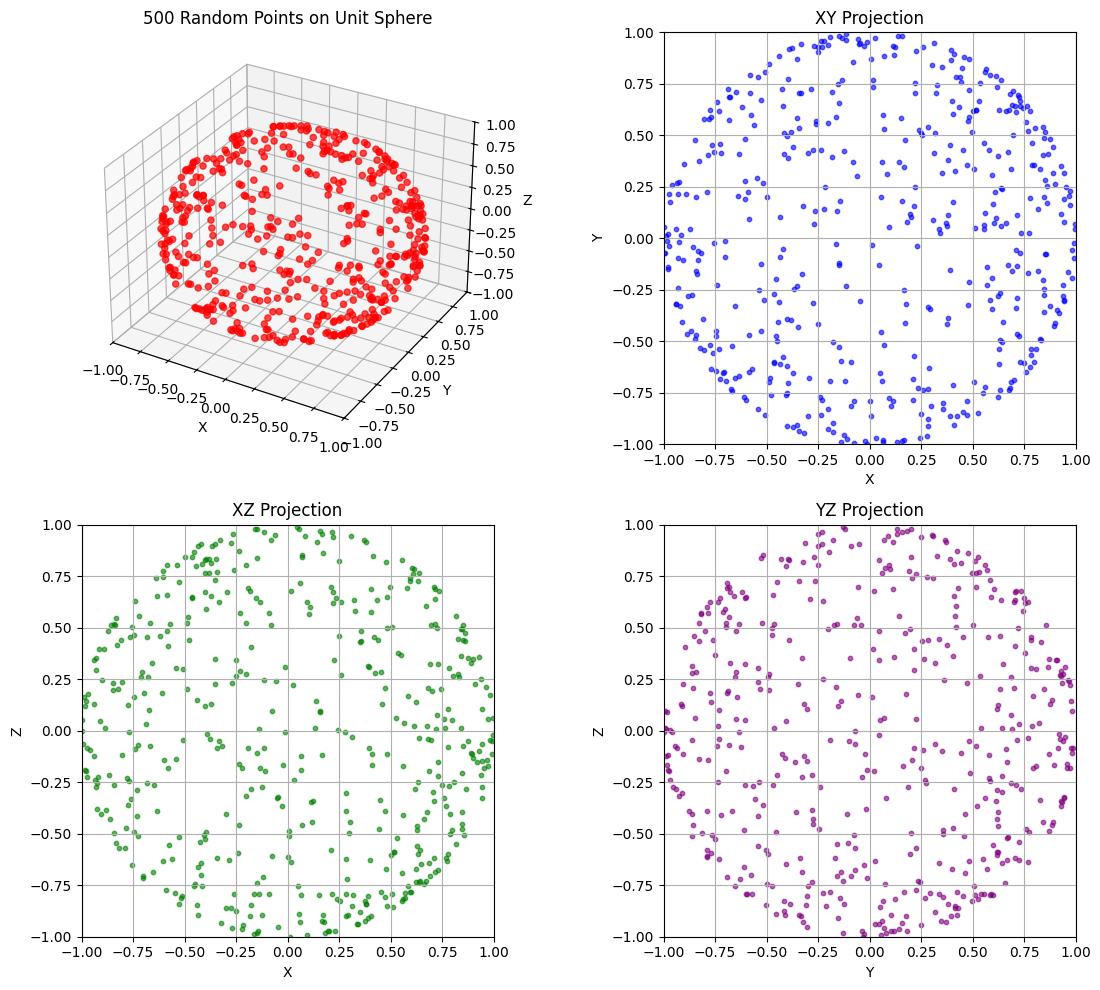


Statistical verification:
Mean distance from origin: 1.000000
Standard deviation of distances: 0.000000
Mean x-coordinate: 0.0410 (should be ≈ 0)
Mean y-coordinate: 0.0275 (should be ≈ 0)
Mean z-coordinate: -0.0245 (should be ≈ 0)


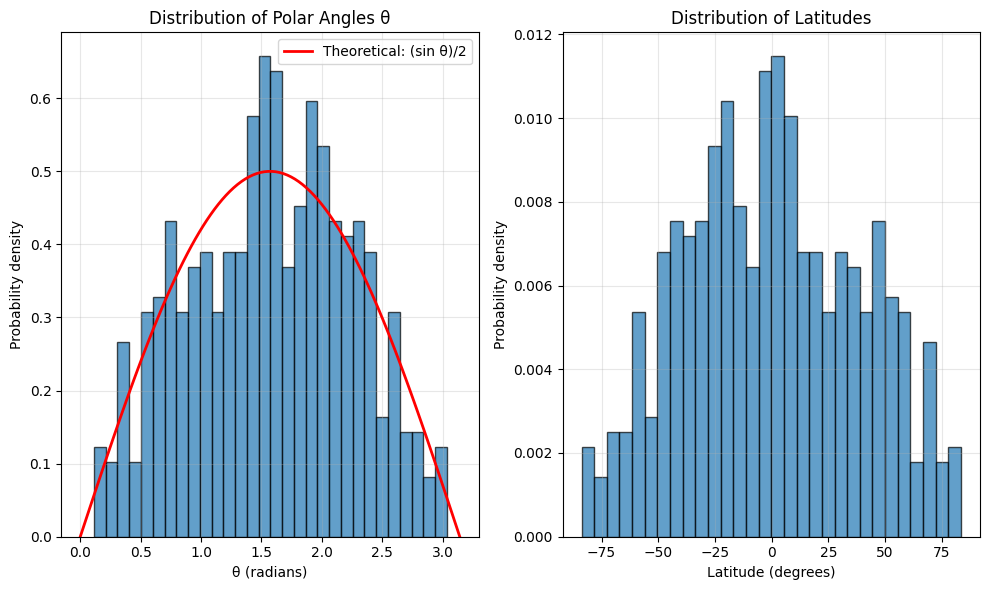

In [1]:
#!/usr/bin/env python3
"""
Exercise 10.12: A random point on the surface of the Earth
Newman's Computational Physics

Parts (c) and (d): Generate random points on sphere surface using
proper spherical coordinate distributions.
"""

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import math

def generate_random_sphere_point():
    """
    Generate a random point on the surface of a unit sphere.
    
    Returns:
        theta: polar angle (from north pole)
        phi: azimuthal angle
    """
    # Generate two uniform random numbers
    r1 = np.random.random()
    r2 = np.random.random()
    
    # Transform to get proper distributions
    phi = 2 * math.pi * r1          # Uniform in [0, 2π]
    theta = math.acos(1 - 2 * r2)   # Properly distributed polar angle
    
    return theta, phi

def spherical_to_cartesian(theta, phi, r=1.0):
    """
    Convert spherical coordinates to Cartesian coordinates.
    
    Args:
        theta: polar angle (from north pole)
        phi: azimuthal angle
        r: radius (default 1.0 for unit sphere)
    
    Returns:
        x, y, z: Cartesian coordinates
    """
    x = r * math.sin(theta) * math.cos(phi)
    y = r * math.sin(theta) * math.sin(phi)
    z = r * math.cos(theta)
    
    return x, y, z

def main():
    """Main function to generate and visualize random points on sphere."""
    
    # Part (c): Generate a single random point
    print("Part (c): Single random point generation")
    print("=" * 40)
    
    theta, phi = generate_random_sphere_point()
    x, y, z = spherical_to_cartesian(theta, phi)
    
    print(f"Random spherical coordinates:")
    print(f"  θ (polar angle): {theta:.4f} radians ({math.degrees(theta):.2f}°)")
    print(f"  φ (azimuthal angle): {phi:.4f} radians ({math.degrees(phi):.2f}°)")
    print(f"Cartesian coordinates:")
    print(f"  x = {x:.4f}")
    print(f"  y = {y:.4f}")
    print(f"  z = {z:.4f}")
    print(f"Distance from origin: {math.sqrt(x**2 + y**2 + z**2):.6f}")
    print()
    
    # Part (d): Generate 500 random points and visualize
    print("Part (d): Generating 500 random points for visualization")
    print("=" * 50)
    
    n_points = 500
    x_coords = []
    y_coords = []
    z_coords = []
    
    # Generate random points
    for i in range(n_points):
        theta, phi = generate_random_sphere_point()
        x, y, z = spherical_to_cartesian(theta, phi)
        x_coords.append(x)
        y_coords.append(y)
        z_coords.append(z)
    
    # Convert to numpy arrays for easier handling
    x_coords = np.array(x_coords)
    y_coords = np.array(y_coords)
    z_coords = np.array(z_coords)
    
    # Create 3D visualization
    fig = plt.figure(figsize=(12, 10))
    
    # 3D scatter plot
    ax1 = fig.add_subplot(221, projection='3d')
    ax1.scatter(x_coords, y_coords, z_coords, c='red', s=20, alpha=0.7)
    ax1.set_xlabel('X')
    ax1.set_ylabel('Y')
    ax1.set_zlabel('Z')
    ax1.set_title('500 Random Points on Unit Sphere')
    ax1.set_xlim([-1, 1])
    ax1.set_ylim([-1, 1])
    ax1.set_zlim([-1, 1])
    
    # 2D projections to verify uniform distribution
    ax2 = fig.add_subplot(222)
    ax2.scatter(x_coords, y_coords, c='blue', s=10, alpha=0.6)
    ax2.set_xlabel('X')
    ax2.set_ylabel('Y')
    ax2.set_title('XY Projection')
    ax2.set_xlim([-1, 1])
    ax2.set_ylim([-1, 1])
    ax2.grid(True)
    ax2.set_aspect('equal')
    
    ax3 = fig.add_subplot(223)
    ax3.scatter(x_coords, z_coords, c='green', s=10, alpha=0.6)
    ax3.set_xlabel('X')
    ax3.set_ylabel('Z')
    ax3.set_title('XZ Projection')
    ax3.set_xlim([-1, 1])
    ax3.set_ylim([-1, 1])
    ax3.grid(True)
    ax3.set_aspect('equal')
    
    ax4 = fig.add_subplot(224)
    ax4.scatter(y_coords, z_coords, c='purple', s=10, alpha=0.6)
    ax4.set_xlabel('Y')
    ax4.set_ylabel('Z')
    ax4.set_title('YZ Projection')
    ax4.set_xlim([-1, 1])
    ax4.set_ylim([-1, 1])
    ax4.grid(True)
    ax4.set_aspect('equal')
    
    plt.tight_layout()
    plt.show()
    
    # Verify uniform distribution by checking some statistics
    print("\nStatistical verification:")
    print(f"Mean distance from origin: {np.mean(np.sqrt(x_coords**2 + y_coords**2 + z_coords**2)):.6f}")
    print(f"Standard deviation of distances: {np.std(np.sqrt(x_coords**2 + y_coords**2 + z_coords**2)):.6f}")
    print(f"Mean x-coordinate: {np.mean(x_coords):.4f} (should be ≈ 0)")
    print(f"Mean y-coordinate: {np.mean(y_coords):.4f} (should be ≈ 0)")
    print(f"Mean z-coordinate: {np.mean(z_coords):.4f} (should be ≈ 0)")
    
    # Check distribution of θ values to verify correctness
    thetas = []
    for i in range(n_points):
        theta, phi = generate_random_sphere_point()
        thetas.append(theta)
    
    # Plot histogram of θ values
    plt.figure(figsize=(10, 6))
    
    plt.subplot(1, 2, 1)
    plt.hist(thetas, bins=30, density=True, alpha=0.7, edgecolor='black')
    # Overlay theoretical distribution
    theta_theory = np.linspace(0, math.pi, 100)
    p_theta_theory = 0.5 * np.sin(theta_theory)
    plt.plot(theta_theory, p_theta_theory, 'r-', linewidth=2, 
             label='Theoretical: (sin θ)/2')
    plt.xlabel('θ (radians)')
    plt.ylabel('Probability density')
    plt.title('Distribution of Polar Angles θ')
    plt.legend()
    plt.grid(True, alpha=0.3)
    
    # Plot distribution in terms of latitude (90° - θ)
    latitudes = [90 - math.degrees(theta) for theta in thetas]
    plt.subplot(1, 2, 2)
    plt.hist(latitudes, bins=30, density=True, alpha=0.7, edgecolor='black')
    plt.xlabel('Latitude (degrees)')
    plt.ylabel('Probability density')
    plt.title('Distribution of Latitudes')
    plt.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()


# Set random seed for reproducibility
np.random.seed(42)
main()